In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sns
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Reading in the full dataset containing the election data and demographic data
UK_fulldataset=pd.read_csv('Outputs/UK_ball_results.csv')
ball_means=pd.read_csv('Output\ball_means_UK.csv')

## K-means

In [3]:
kmeans_data = UK_fulldataset[['qunone', 'qu1', 'qu2', 'qu3', 'qu4', 'quother', 'White',
       'nssec_student', 'nssec_higher_managerial', 'nssec_intermediate',
       'nssec_lower_managerial', 'nssec_lower_supervisory', 'nssec_unemployed',
       'nssec_routine', 'nssec_semi_routine', 'nssec_small_employers',
       'age_under18', 'age_1824', 'age_2534', 'age_3549', 'age_5064',
       'age_over65', 'Urban', 'dep_none', 'dep_one', 'dep_two_more']]

### Elbow plot

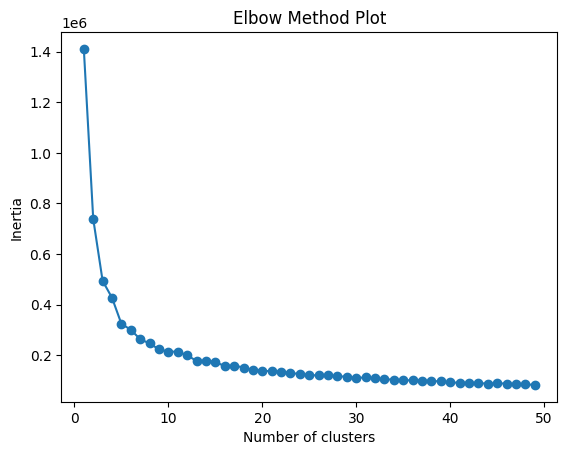

In [4]:
inertias = []

for i in range(1,50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,50), inertias, marker='o')
plt.title('Elbow Method Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('UK results/Robustness/km_uk_elbowplot.png')
plt.show()

### Silhouette score

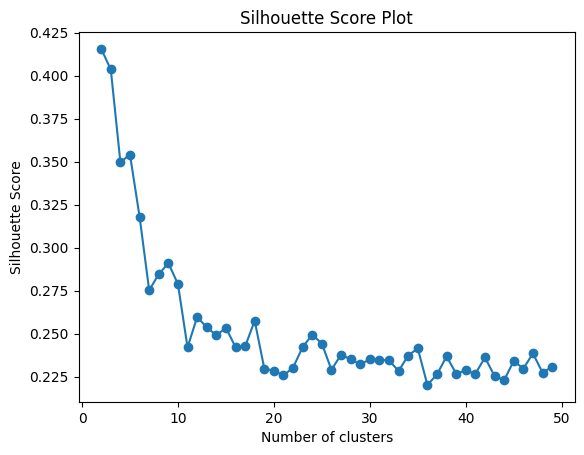

In [5]:
scores = []

for i in range(2,50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(kmeans_data)
    score=silhouette_score(kmeans_data, kmeans.labels_)
    scores.append(score)
    

plt.plot(range(2,50), scores, marker='o')
plt.title('Silhouette Score Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('UK results/Robustness/km_uk_silhouetteplot.png')
plt.show()

In [6]:
# Applying K-means with the number of clusters equal to the number of balls
kmeans = KMeans(n_clusters=38, random_state=0, n_init="auto").fit(kmeans_data)
UK_fulldataset['cluster']=kmeans.labels_

In [7]:
columns=['Con2019','Leave','qunone', 'qu1', 'qu2', 'qu3', 'qu4',
       'quother', 'White', 'nssec_student', 'nssec_higher_managerial',
       'nssec_intermediate', 'nssec_lower_managerial',
       'nssec_lower_supervisory', 'nssec_unemployed', 'nssec_routine',
       'nssec_semi_routine', 'nssec_small_employers', 'age_under18',
       'age_1824', 'age_2534', 'age_3549', 'age_5064', 'age_over65', 'Urban',
       'dep_none', 'dep_one', 'dep_two_more']

km_means=pd.DataFrame()
for col in columns:
    km_means[col]=UK_fulldataset.groupby('cluster')[col].mean()

In [8]:
#creating dataframe with mean for each variable in each ball and cluster
km_means['ctype']='kmeans'
ball_means['ctype']='TDABM'
clustm = pd.concat([km_means,ball_means])

In [11]:
clustm=clustm[['Con2019','White','qu4','nssec_routine','age_over65','dep_two_more','ctype']]
clustm = clustm.reset_index(drop=True)

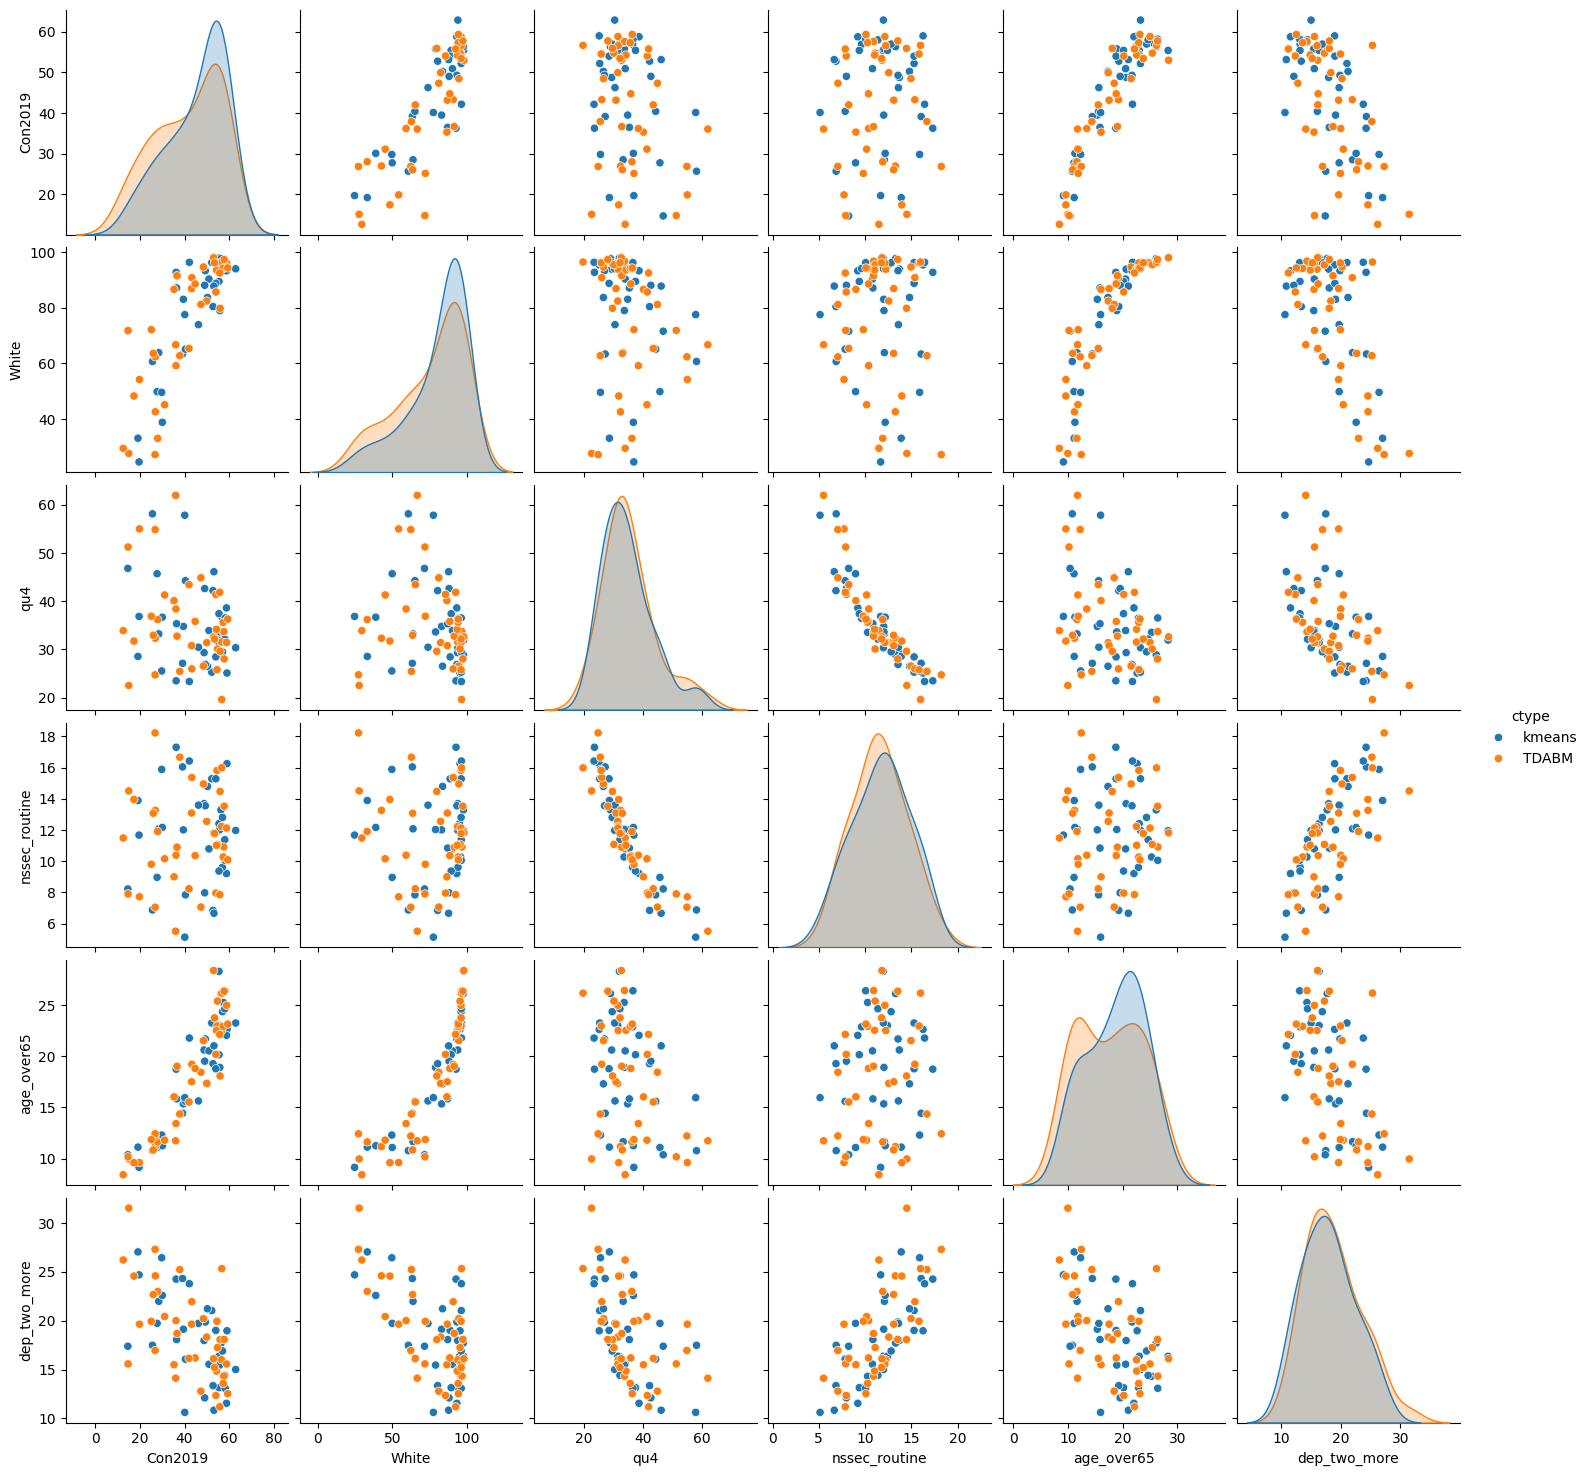

In [13]:
#Pairplot of some of the variables highlighting the differences in K-Means and TDABM.
sns.pairplot(clustm,hue='ctype')
plt.savefig('UK results/Robustness/kmeans_TDABM_pairplot_uk.png')


## Different Epsilon

In [14]:
bmx1=UK_fulldataset[['qunone', 'qu1', 'qu2', 'qu3', 'qu4', 'quother', 'White',
       'nssec_student', 'nssec_higher_managerial', 'nssec_intermediate',
       'nssec_lower_managerial', 'nssec_lower_supervisory', 'nssec_unemployed',
       'nssec_routine', 'nssec_semi_routine', 'nssec_small_employers',
       'age_under18', 'age_1824', 'age_2534', 'age_3549', 'age_5064',
       'age_over65', 'Urban', 'dep_none', 'dep_one', 'dep_two_more']]

### Epsilon=17

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


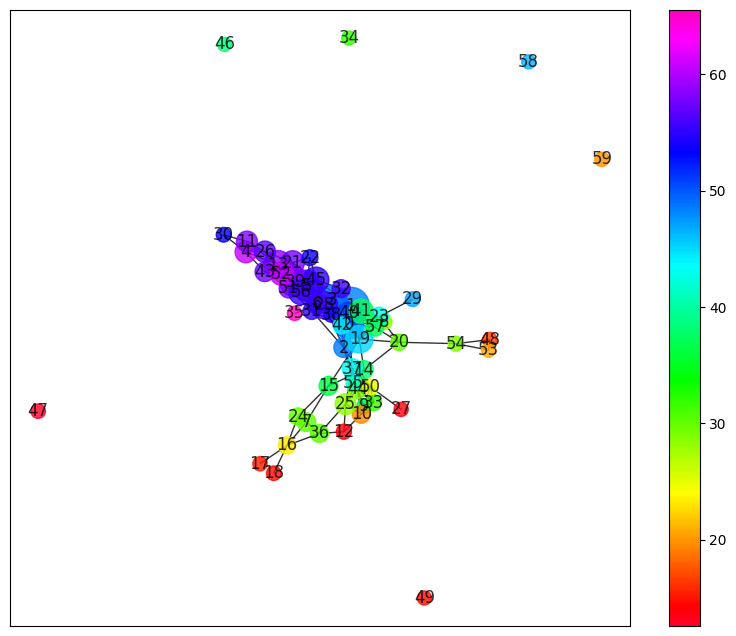

In [15]:
cdf = pd.DataFrame(UK_fulldataset['Con2019'])
bm1=pbm.BallMapper(X=bmx1, eps=17 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Con2019',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5))
plt.savefig('UK results/Robustness/UK_robustness_17.png')
plt.show() 

### Epsilon=19

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


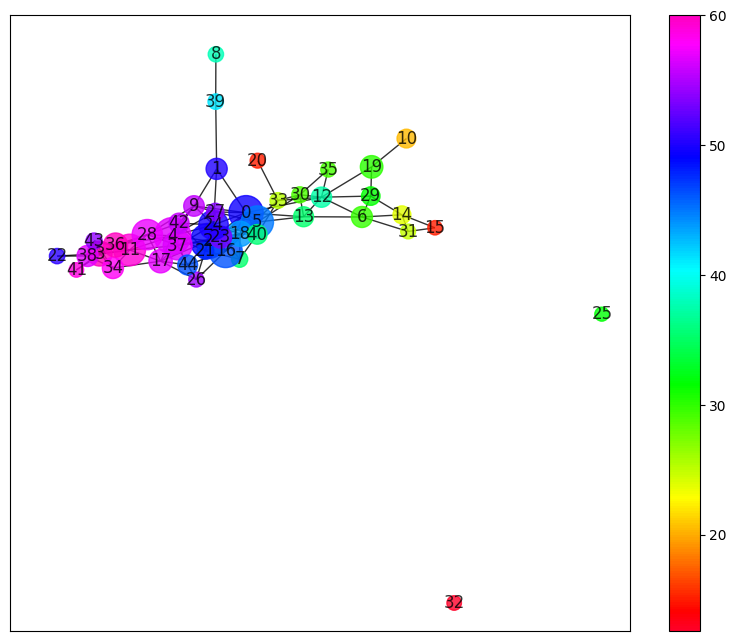

In [16]:
cdf = pd.DataFrame(UK_fulldataset['Con2019'])
bm1=pbm.BallMapper(X=bmx1, eps=19 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Con2019',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5))
plt.savefig('UK results/Robustness/UK_robustness_19.png')
plt.show() 

### Epsilon=21

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


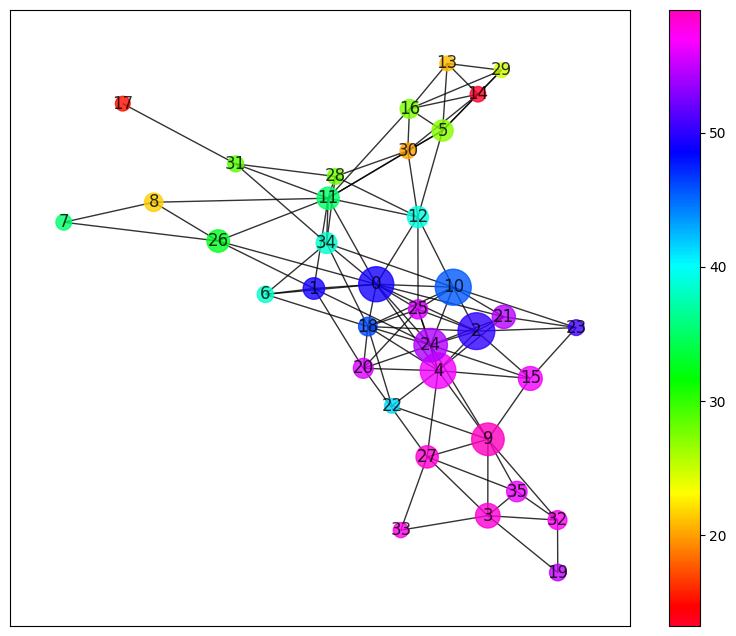

In [17]:
cdf = pd.DataFrame(UK_fulldataset['Con2019'])
bm1=pbm.BallMapper(X=bmx1, eps=21 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Con2019',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5))
plt.savefig('UK results/Robustness/UK_robustness_21.png')
plt.show() 

### Epsilon=23

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


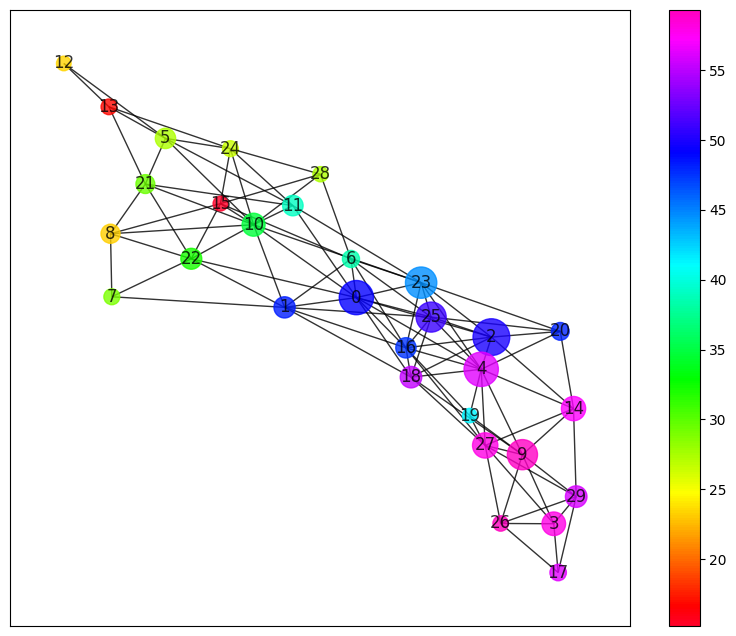

In [18]:
cdf = pd.DataFrame(UK_fulldataset['Con2019'])
bm1=pbm.BallMapper(X=bmx1, eps=23 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Con2019',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5))
plt.savefig('UK results/Robustness/UK_robustness_23.png')
plt.show() 